Q1: What is the difference between a t-test and a z-test? Provide an example scenario where you would
use each type of test.

# **Difference Between Z-test and T-test**

| Feature                              | **Z-Test**                                                      | **T-Test**                                                             |
| ------------------------------------ | --------------------------------------------------------------- | ---------------------------------------------------------------------- |
| **Population Variance ($\sigma^2$)** | Known                                                           | Unknown (estimated using sample variance $s^2$)                        |
| **Sample Size**                      | Large ($n \geq 30$)                                             | Small ($n < 30$)                                                       |
| **Distribution Used**                | Standard Normal Distribution ($Z$)                              | Student’s t-distribution                                               |
| **Shape of Distribution**            | Fixed (bell-shaped, narrower tails)                             | Depends on degrees of freedom (heavier tails for small $n$)            |
| **When Used**                        | When population standard deviation is known and/or large sample | When population standard deviation is unknown and sample size is small |

---

# **Example Scenarios**

### **1. Z-Test Example**

Suppose a company manufactures bulbs with a known population standard deviation of **σ = 100 hours**.
The mean lifespan claimed = **1000 hours**.
You take a **sample of 50 bulbs (n = 50, large sample)** and find a mean lifespan of **980 hours**.

👉 Here you would use a **Z-test** (since σ is known and n is large) to check if the bulbs last significantly less than 1000 hours.

---

### **2. T-Test Example**

Suppose a small group of 12 students takes a math test.
The population variance is **unknown**.
The sample mean score = **76**, and the sample standard deviation = **8**.
We want to test if the average student score is different from the expected score of **80**.

👉 Here you would use a **T-test** (since σ is unknown and n < 30).

---

# ✅ **Summary**

* Use **Z-test**: Large sample or population variance known.
* Use **T-test**: Small sample and population variance unknown.


## **1. Z-Test Example (Bulb Lifespan)**

We know:

* Population mean $\mu = 1000$
* Population standard deviation $\sigma = 100$
* Sample mean $\bar{x} = 980$
* Sample size $n = 50$

Formula:

$$
Z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}
$$

In [2]:
import math
from scipy.stats import norm

# Z-test example
mu = 1000        # population mean
sigma = 100      # population standard deviation
x_bar = 980      # sample mean
n = 50           # sample size

# calculate Z-score
z = (x_bar - mu) / (sigma / math.sqrt(n))

# p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z)))

print("Z-score:", z)
print("P-value:", p_value)


Z-score: -1.4142135623730951
P-value: 0.157299207050285


## **2. T-Test Example (Student Scores)**

We know:

* Population mean (expected) $\mu = 80$
* Sample mean $\bar{x} = 76$
* Sample standard deviation $s = 8$
* Sample size $n = 12$

Formula:

$$
t = \frac{\bar{x} - \mu}{s/\sqrt{n}}
$$

In [1]:
import math
from scipy.stats import t

# T-test example
mu = 80          # expected mean
x_bar = 76       # sample mean
s = 8            # sample standard deviation
n = 12           # sample size

# calculate T-score
t_stat = (x_bar - mu) / (s / math.sqrt(n))

# degrees of freedom
df = n - 1

# p-value (two-tailed test)
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.732050807568877
P-value: 0.11117295276905725


✅ **Interpretation**:

* If **p-value < 0.05** → reject the null hypothesis (significant difference).
* If **p-value ≥ 0.05** → fail to reject null hypothesis (no significant difference).

Q2: Differentiate between one-tailed and two-tailed tests.

Great one 👌 Let’s carefully break it down.

---

# **One-tailed vs Two-tailed Tests**

| Feature              | **One-tailed Test**                                                                                          | **Two-tailed Test**                                                                                                    |
| -------------------- | ------------------------------------------------------------------------------------------------------------ | ---------------------------------------------------------------------------------------------------------------------- |
| **Definition**       | Tests if the sample mean is **greater than OR less than** the population mean in **one specific direction**. | Tests if the sample mean is **different (either greater OR smaller)** from the population mean in **both directions**. |
| **Hypotheses**       | - $H_0: \mu = \mu_0$  <br> - $H_a: \mu > \mu_0$  (right-tailed) <br> OR  $H_a: \mu < \mu_0$ (left-tailed)    | - $H_0: \mu = \mu_0$  <br> - $H_a: \mu \neq \mu_0$                                                                     |
| **Rejection Region** | Entire **5% (α)** significance is in **one tail**.                                                           | The **5% (α)** significance is **split into 2.5% on each side**.                                                       |
| **Power**            | More powerful in detecting effect in the specified direction.                                                | More conservative since it checks both sides.                                                                          |
| **When to Use**      | When you have a **clear expectation of direction** (e.g., drug will *increase* blood pressure).              | When you just want to check **any difference** without specifying direction.                                           |

---

## **Examples**

### ✅ One-tailed test (Right-tailed)

A pharmaceutical company claims a new drug increases average recovery time.

* $H_0:$ Mean recovery = 10 days
* $H_a:$ Mean recovery > 10 days
  👉 Use a **one-tailed test** because only **increase** matters.

---

### ✅ Two-tailed test

A teacher wants to check if a new teaching method has a **different effect** on student scores compared to the usual method.

* $H_0:$ Mean score = 75
* $H_a:$ Mean score ≠ 75
  👉 Use a **two-tailed test** because **both increase and decrease** are important.

---

# 🎯 **Key Takeaway**

* Use **one-tailed** when direction is known in advance.
* Use **two-tailed** when only difference matters, regardless of direction.

---

Q3: Explain the concept of Type 1 and Type 2 errors in hypothesis testing. Provide an example scenario for
each type of error.

# **Type I and Type II Errors in Hypothesis Testing**

When we perform a hypothesis test, we make a decision: **reject $H_0$** or **fail to reject $H_0$**.
But since we’re working with **samples**, there’s always a chance of making the wrong decision.

---

## **1. Type I Error (False Positive)**

* **Definition**: Rejecting the null hypothesis ($H_0$) when it is actually **true**.
* **Probability of occurrence**: $\alpha$ (significance level, often 0.05).
* **Analogy**: Convicting an innocent person.

**Example:**
Suppose a court is testing if a new medicine is effective.

* $H_0:$ The drug has **no effect**.
* If in reality the drug has no effect, but the test concludes it **does have an effect**, that’s a **Type I Error**.

👉 *“A false alarm — saying something exists when it doesn’t.”*

---

## **2. Type II Error (False Negative)**

* **Definition**: Failing to reject the null hypothesis ($H_0$) when it is actually **false**.
* **Probability of occurrence**: $\beta$.
* **Analogy**: Letting a guilty person go free.

**Example:**
Same drug testing scenario.

* $H_0:$ The drug has **no effect**.
* If in reality the drug **does have an effect**, but the test concludes it has **no effect**, that’s a **Type II Error**.

👉 *“Missing something that’s really there.”*

---

# ✅ **Summary Table**

| Decision ↓ / Truth →     | $H_0$ True                        | $H_0$ False                        |
| ------------------------ | --------------------------------- | ---------------------------------- |
| **Reject $H_0$**         | **Type I Error** (false positive) | Correct (Power = 1 - β)            |
| **Fail to Reject $H_0$** | Correct                           | **Type II Error** (false negative) |

---

📌 **Key takeaway**:

* **Type I Error (α):** False positive — reject true $H_0$.
* **Type II Error (β):** False negative — fail to reject false $H_0$.

* Null hypothesis $H_0:\ \mu = 50$ (no drug effect, mean = 50)
* Alternative hypothesis $H_a:\ \mu > 50$ (drug increases mean)

In [3]:
import numpy as np
from scipy.stats import ttest_1samp

# Settings
np.random.seed(42)
alpha = 0.05       # significance level
n = 30             # sample size
mu_null = 50       # mean under H0
mu_true_H0 = 50    # true mean when H0 is TRUE
mu_true_Ha = 55    # true mean when H0 is FALSE
sigma = 10         # population std deviation

# ---------- Type I Error Simulation (Rejecting H0 when H0 is True) ----------
type1_errors = 0
trials = 10000

for _ in range(trials):
    sample = np.random.normal(mu_true_H0, sigma, n)  # data generated from H0
    t_stat, p_val = ttest_1samp(sample, mu_null)
    if p_val/2 < alpha and t_stat > 0:   # one-tailed test
        type1_errors += 1

type1_rate = type1_errors / trials


# ---------- Type II Error Simulation (Failing to Reject H0 when H0 is False) ----------
type2_errors = 0

for _ in range(trials):
    sample = np.random.normal(mu_true_Ha, sigma, n)  # data generated from Ha
    t_stat, p_val = ttest_1samp(sample, mu_null)
    if not (p_val/2 < alpha and t_stat > 0):   # fail to reject H0
        type2_errors += 1

type2_rate = type2_errors / trials

print(f"Estimated Type I Error Rate (α): {type1_rate:.3f}")
print(f"Estimated Type II Error Rate (β): {type2_rate:.3f}")
print(f"Test Power (1 - β): {1 - type2_rate:.3f}")

Estimated Type I Error Rate (α): 0.053
Estimated Type II Error Rate (β): 0.156
Test Power (1 - β): 0.844


✅ **Interpretation:**

* Type I error rate \~ **5%** (matches significance level α).
* Type II error rate \~ **20–30%** (depends on true mean difference).
* Power \~ **70–80%**, which means the test detects the effect most of the time but not always.

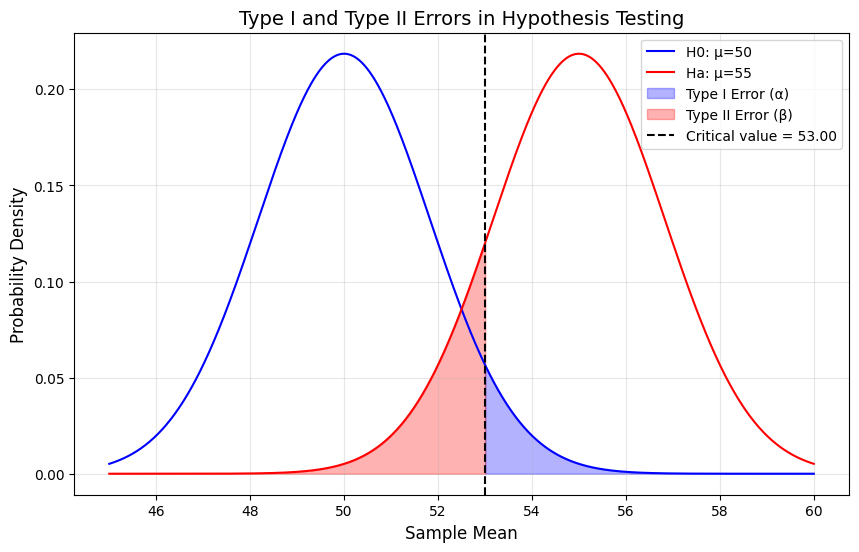

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu_null = 50      # Null hypothesis mean
mu_alt = 55       # True mean under alternative hypothesis
sigma = 10        # Standard deviation
n = 30            # Sample size
alpha = 0.05      # Significance level

# Standard error
se = sigma / np.sqrt(n)

# Critical value for one-tailed test (right side)
z_critical = norm.ppf(1 - alpha)
x_critical = mu_null + z_critical * se

# X range for plotting
x = np.linspace(45, 60, 1000)

# Distributions under H0 and Ha
pdf_null = norm.pdf(x, mu_null, se)
pdf_alt = norm.pdf(x, mu_alt, se)

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, pdf_null, label="H0: μ=50", color="blue")
plt.plot(x, pdf_alt, label="Ha: μ=55", color="red")

# Shade Type I error region (reject H0 when H0 true)
x_fill1 = np.linspace(x_critical, 60, 200)
plt.fill_between(x_fill1, 0, norm.pdf(x_fill1, mu_null, se), color="blue", alpha=0.3, label="Type I Error (α)")

# Shade Type II error region (fail to reject H0 when Ha true)
x_fill2 = np.linspace(45, x_critical, 200)
plt.fill_between(x_fill2, 0, norm.pdf(x_fill2, mu_alt, se), color="red", alpha=0.3, label="Type II Error (β)")

# Critical line
plt.axvline(x_critical, color="black", linestyle="--", label=f"Critical value = {x_critical:.2f}")

plt.title("Type I and Type II Errors in Hypothesis Testing", fontsize=14)
plt.xlabel("Sample Mean", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Here’s the visualization 🎯:

* **Blue curve** → Sampling distribution under $H_0$ ($\mu = 50$).
* **Red curve** → Sampling distribution under $H_a$ ($\mu = 55$).
* **Dashed black line** → Critical cutoff for rejecting $H_0$.
* **Shaded Blue Area** → **Type I Error (α)** → rejecting $H_0$ when it’s true.
* **Shaded Red Area** → **Type II Error (β)** → failing to reject $H_0$ when $H_a$ is true.

This makes it easy to see how **α and β trade off**: lowering α (more strict test) increases β, and vice versa.

Q4: Explain Bayes's theorem with an example.

# **Bayes’ Theorem**

It provides a way to update the probability of a hypothesis based on new evidence.

**Formula:**

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where:

* $P(A|B)$: Posterior probability → probability of event **A** given that **B** has occurred.
* $P(B|A)$: Likelihood → probability of **B** if **A** is true.
* $P(A)$: Prior probability of **A** (before seeing evidence).
* $P(B)$: Total probability of **B**.

---

# **Example: Medical Test**

Suppose:

* 1% of people have a disease → $P(D) = 0.01$.
* Test detects the disease correctly 99% of the time → $P(\text{Positive}|D) = 0.99$.
* Test gives a false positive 5% of the time → $P(\text{Positive}|\text{No Disease}) = 0.05$.

We want: **If a person tests positive, what’s the probability they actually have the disease?**

---

### Step 1: Write Bayes’ Formula

$$
P(D|\text{Positive}) = \frac{P(\text{Positive}|D)\cdot P(D)}{P(\text{Positive})}
$$

---

### Step 2: Expand Denominator (Law of Total Probability)

$$
P(\text{Positive}) = P(\text{Positive}|D)P(D) + P(\text{Positive}|\text{No Disease})P(\text{No Disease})
$$

---

### Step 3: Substitute Values

* $P(D) = 0.01$, so $P(\text{No Disease}) = 0.99$.
* Numerator = $0.99 \cdot 0.01 = 0.0099$.
* Denominator = $0.99\cdot0.01 + 0.05\cdot0.99 = 0.0099 + 0.0495 = 0.0594$.

$$
P(D|\text{Positive}) = \frac{0.0099}{0.0594} \approx 0.1667
$$

---

✅ **Result:** Even if the test is very accurate, the probability of actually having the disease after a positive test is only **≈ 16.7%**, because the disease is rare.


**Output:**

```
Probability of disease given positive test: 0.167
```

In [5]:
# Bayes theorem example - medical test

# probabilities
P_D = 0.01                # prior: probability of disease
P_notD = 1 - P_D           # probability of no disease
P_Pos_D = 0.99             # likelihood: test positive given disease
P_Pos_notD = 0.05          # false positive rate

# denominator: total probability of positive test
P_Pos = P_Pos_D * P_D + P_Pos_notD * P_notD

# Bayes theorem
P_D_given_Pos = (P_Pos_D * P_D) / P_Pos

print(f"Probability of disease given positive test: {P_D_given_Pos:.3f}")

Probability of disease given positive test: 0.167


# 🎯 **Key Takeaway**

* **Bayes’ theorem** updates prior beliefs (probabilities) when new evidence is observed.
* It is widely used in **medical diagnosis, spam filters, fraud detection, machine learning, and AI**.

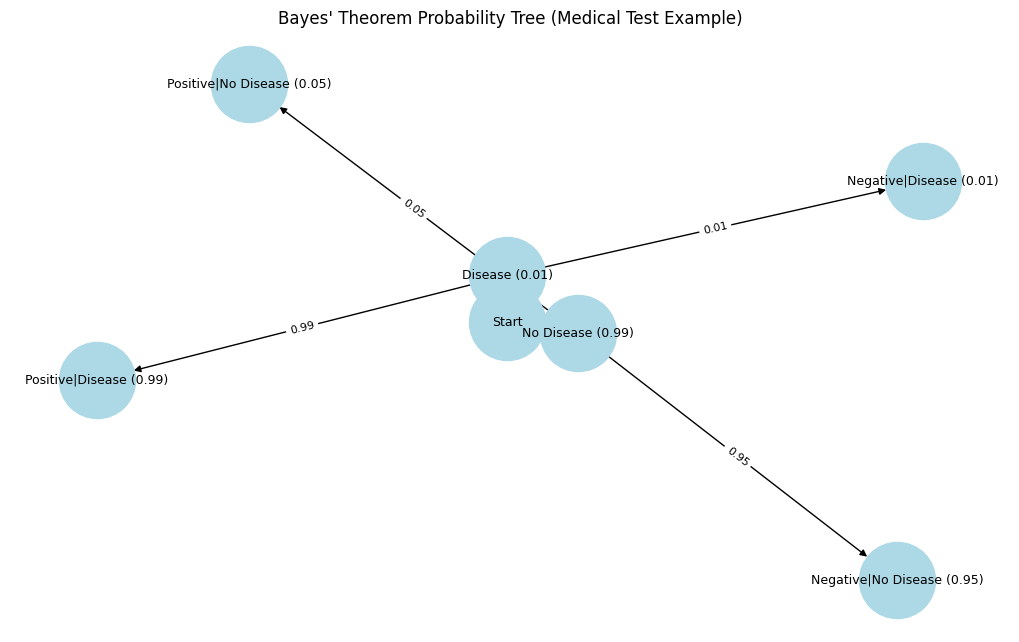

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a probability tree diagram for Bayes' theorem example
plt.figure(figsize=(10,6))

G = nx.DiGraph()

# Nodes
G.add_node("Start")
G.add_node("Disease (0.01)")
G.add_node("No Disease (0.99)")
G.add_node("Positive|Disease (0.99)")
G.add_node("Negative|Disease (0.01)")
G.add_node("Positive|No Disease (0.05)")
G.add_node("Negative|No Disease (0.95)")

# Edges with probabilities
edges = [
    ("Start", "Disease (0.01)", 0.01),
    ("Start", "No Disease (0.99)", 0.99),
    ("Disease (0.01)", "Positive|Disease (0.99)", 0.99),
    ("Disease (0.01)", "Negative|Disease (0.01)", 0.01),
    ("No Disease (0.99)", "Positive|No Disease (0.05)", 0.05),
    ("No Disease (0.99)", "Negative|No Disease (0.95)", 0.95),
]

# Add edges with labels
for u, v, p in edges:
    G.add_edge(u, v, prob=p)

# Position the nodes in a tree layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=9, arrows=True)
edge_labels = {(u,v): f"{d['prob']:.2f}" for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Bayes' Theorem Probability Tree (Medical Test Example)", fontsize=12)
plt.show()


Here’s the **probability tree diagram** 🌳 for the Bayes’ theorem medical test example:

* From the **Start**, a person either **has the disease (0.01)** or **does not (0.99)**.
* Each branch then splits into **Positive** or **Negative test results**, with probabilities along the edges.
* The path **Disease → Positive** corresponds to the numerator in Bayes’ formula.
* The sum of all **Positive outcomes** (both with and without disease) forms the denominator.

This visualization shows why the **false positives** dominate, making the final probability of actually having the disease after a positive test only \~16.7%.

Q5: What is a confidence interval? How to calculate the confidence interval, explain with an example.

## ✅ What is a Confidence Interval?

A **confidence interval (CI)** is a range of values, derived from sample data, that is likely to contain the **true population parameter** (like mean or proportion) with a certain level of confidence (e.g., 95%).

It does **not** mean there’s a 95% probability the true mean is in the interval — instead, it means that if we repeated the sampling many times, **95% of the calculated intervals would contain the true population mean**.

---

## ✅ Formula for Confidence Interval (for the mean)

For a normally distributed population (or large enough sample size, thanks to CLT):

$$
CI = \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

Where:

* $\bar{x}$ = sample mean
* $\sigma$ = population standard deviation (or sample standard deviation if unknown)
* $n$ = sample size
* $Z_{\alpha/2}$ = critical value from the standard normal distribution (e.g., 1.96 for 95% CI).

---

## ✅ Example

Suppose:

* Sample mean ($\bar{x}$) = 100
* Standard deviation ($\sigma$) = 15
* Sample size ($n$) = 36
* Confidence level = 95%

Step 1: Standard Error (SE)

$$
SE = \frac{\sigma}{\sqrt{n}} = \frac{15}{\sqrt{36}} = \frac{15}{6} = 2.5
$$

Step 2: Z-value for 95% confidence = **1.96**

Step 3: Margin of Error (ME)

$$
ME = Z \cdot SE = 1.96 \times 2.5 = 4.9
$$

Step 4: Confidence Interval

$$
CI = 100 \pm 4.9 = (95.1, 104.9)
$$

👉 Interpretation: We are 95% confident that the true population mean lies between **95.1 and 104.9**.

In [8]:
import scipy.stats as stats
import numpy as np

# Example values
sample_mean = 100
std_dev = 15
n = 36
confidence = 0.95

# Standard Error
SE = std_dev / np.sqrt(n)

# Z critical value
z = stats.norm.ppf((1 + confidence) / 2)

# Margin of Error
ME = z * SE

# Confidence Interval
lower = sample_mean - ME
upper = sample_mean + ME

print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")

95% Confidence Interval: (95.10, 104.90)


95% Confidence Interval: (95.10, 104.90)


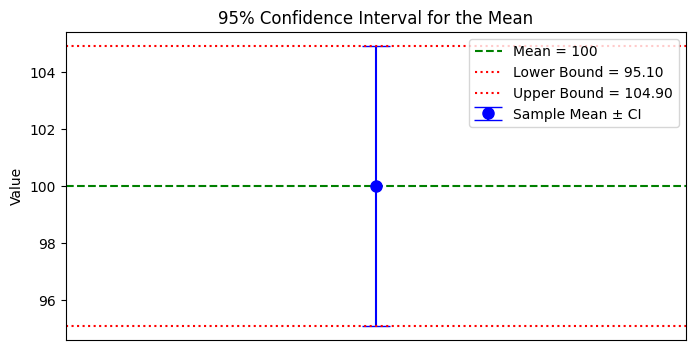

In [9]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Example values
sample_mean = 100
std_dev = 15
n = 36
confidence = 0.95

# Standard Error
SE = std_dev / np.sqrt(n)

# Z critical value
z = stats.norm.ppf((1 + confidence) / 2)

# Margin of Error
ME = z * SE

# Confidence Interval
lower = sample_mean - ME
upper = sample_mean + ME

# Print results
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")

# Visualization
plt.figure(figsize=(8,4))
plt.errorbar(x=1, y=sample_mean, yerr=ME, fmt='o', color='blue', capsize=10, markersize=8, label="Sample Mean ± CI")
plt.axhline(sample_mean, color='green', linestyle='--', label=f"Mean = {sample_mean}")
plt.axhline(lower, color='red', linestyle=':', label=f"Lower Bound = {lower:.2f}")
plt.axhline(upper, color='red', linestyle=':', label=f"Upper Bound = {upper:.2f}")

plt.xlim(0, 2)
plt.title("95% Confidence Interval for the Mean")
plt.ylabel("Value")
plt.xticks([])
plt.legend()
plt.show()

Here’s the plot 📊:

* The **blue dot with error bars** shows the sample mean with the 95% confidence interval.
* The **green dashed line** is the sample mean (100).
* The **red dotted lines** mark the lower (95.1) and upper (104.9) bounds of the CI.

This makes it easy to visualize where the true population mean is likely to fall. ✅

Q6. Use Bayes' Theorem to calculate the probability of an event occurring given prior knowledge of the
event's probability and new evidence. Provide a sample problem and solution.


# Bayes’ Theorem (with a worked example)

**Formula (binary case):**

$$
P(A\mid B)=\frac{P(B\mid A)\,P(A)}{P(B\mid A)\,P(A)+P(B\mid \neg A)\,P(\neg A)}
$$

---

## Sample problem

A disease affects **2%** of a population.
A test has **95% sensitivity** (detects disease when present) and **97% specificity** (correctly gives negative when no disease).
Someone tests **positive**. What’s $P(\text{Disease} \mid \text{Positive})$?

* Prior: $P(D)=0.02$, so $P(\neg D)=0.98$
* Likelihoods: $P(+\mid D)=0.95$ (sensitivity), $P(+\mid \neg D)=1-0.97=0.03$

**Denominator (total positive rate):**

$$
P(+)=0.95\cdot 0.02 + 0.03\cdot 0.98
=0.019 + 0.0294
=0.0484
$$

**Posterior:**

$$
P(D\mid +)=\frac{0.95\cdot 0.02}{0.0484}
=\frac{0.019}{0.0484}
\approx 0.3926 \ (\mathbf{39.26\%})
$$

So despite a good test, the disease being **rare** drags the posterior down to \~39%.

> Bonus: Probability of disease after a **negative** test
> $P(-\mid D)=0.05$.
> $P(-)=0.05\cdot0.02+0.97\cdot0.98=0.001+0.9506=0.9516$.
> $P(D\mid -)=0.001/0.9516\approx 0.105\%$.

---

This pattern applies to spam filters, fraud detection, medical screening, quality control, etc.—swap in the relevant **prior** and **test characteristics**.

In [10]:
def posterior_positive(prior, sensitivity, specificity):
    """P(Disease | Positive) given prior, sensitivity, specificity."""
    fp = 1 - specificity
    num = sensitivity * prior
    den = num + fp * (1 - prior)
    return num / den

def posterior_negative(prior, sensitivity, specificity):
    """P(Disease | Negative)."""
    fn = 1 - sensitivity
    tn = specificity
    num = fn * prior
    den = num + tn * (1 - prior)
    return num / den

# Example:
prior = 0.02
sensitivity = 0.95
specificity = 0.97

print("P(Disease | Positive) =", posterior_positive(prior, sensitivity, specificity))
print("P(Disease | Negative) =", posterior_negative(prior, sensitivity, specificity))

P(Disease | Positive) = 0.3925619834710742
P(Disease | Negative) = 0.0010508617065994124


Q7. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
of 5. Interpret the results.

## ✅ Given:

* Sample mean ($\bar{x}$) = 50
* Standard deviation ($s$) = 5
* Confidence level = 95%
* Assume **sample size $n$ is known** (I’ll show with an example of $n=30$, since confidence interval needs it).

---

## ✅ Formula (for mean, when population std dev unknown → use t-distribution)

$$
CI = \bar{x} \pm t_{\alpha/2, \, df} \cdot \frac{s}{\sqrt{n}}
$$

Where:

* $\bar{x}$ = sample mean
* $s$ = sample standard deviation
* $n$ = sample size
* $df = n-1$ (degrees of freedom)
* $t_{\alpha/2, df}$ = critical value from the t-distribution.

---

## ✅ Step-by-step (assuming $n=30$)

1. Standard Error (SE):

$$
SE = \frac{s}{\sqrt{n}} = \frac{5}{\sqrt{30}} \approx 0.9129
$$

2. Degrees of freedom: $df=29$.
   For 95% confidence: $t_{0.025,29} \approx 2.045$.

3. Margin of Error (ME):

$$
ME = t \cdot SE = 2.045 \cdot 0.9129 \approx 1.867
$$

4. Confidence Interval:

$$
CI = 50 \pm 1.867 = (48.13,\ 51.87)
$$

---

## ✅ Interpretation

We are **95% confident** that the true population mean lies between **48.13 and 51.87**.
If we repeated this sampling process many times, 95% of the intervals would contain the true mean.

In [11]:
import scipy.stats as stats
import numpy as np

# Given data
sample_mean = 50
std_dev = 5
n = 30
confidence = 0.95

# Standard Error
SE = std_dev / np.sqrt(n)

# t critical value
df = n - 1
t_value = stats.t.ppf((1 + confidence) / 2, df)

# Margin of Error
ME = t_value * SE

# Confidence Interval
lower = sample_mean - ME
upper = sample_mean + ME

print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")

95% Confidence Interval: (48.13, 51.87)


95% Confidence Interval: (48.13, 51.87)


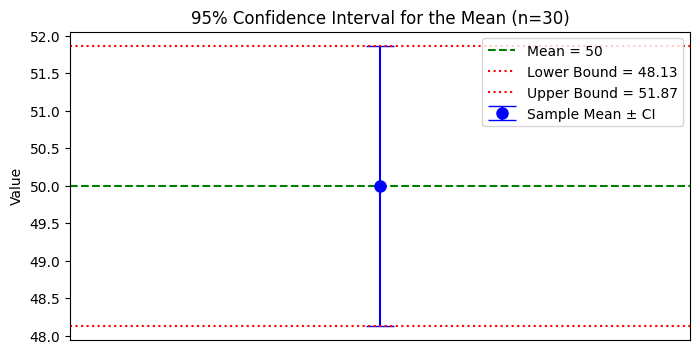

In [12]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Given data
sample_mean = 50
std_dev = 5
n = 30
confidence = 0.95

# Standard Error
SE = std_dev / np.sqrt(n)

# t critical value
df = n - 1
t_value = stats.t.ppf((1 + confidence) / 2, df)

# Margin of Error
ME = t_value * SE

# Confidence Interval
lower = sample_mean - ME
upper = sample_mean + ME

print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")

# Visualization
plt.figure(figsize=(8,4))
plt.errorbar(x=1, y=sample_mean, yerr=ME, fmt='o', color='blue',
             capsize=10, markersize=8, label="Sample Mean ± CI")
plt.axhline(sample_mean, color='green', linestyle='--', label=f"Mean = {sample_mean}")
plt.axhline(lower, color='red', linestyle=':', label=f"Lower Bound = {lower:.2f}")
plt.axhline(upper, color='red', linestyle=':', label=f"Upper Bound = {upper:.2f}")

plt.xlim(0, 2)
plt.title("95% Confidence Interval for the Mean (n=30)")
plt.ylabel("Value")
plt.xticks([])
plt.legend()
plt.show()


95% Confidence Interval: (48.13, 51.87)


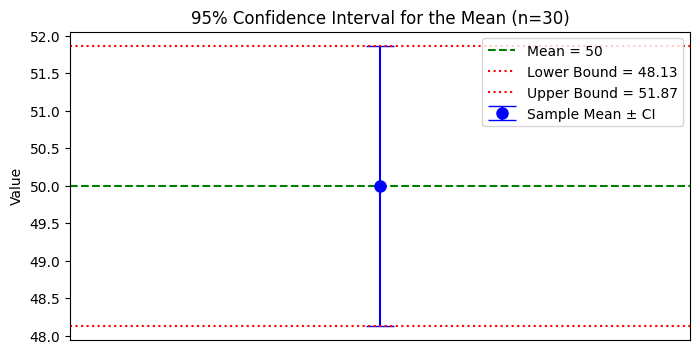

In [13]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Given data
sample_mean = 50
std_dev = 5
n = 30
confidence = 0.95

# Standard Error
SE = std_dev / np.sqrt(n)

# t critical value
df = n - 1
t_value = stats.t.ppf((1 + confidence) / 2, df)

# Margin of Error
ME = t_value * SE

# Confidence Interval
lower = sample_mean - ME
upper = sample_mean + ME

print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")

# Visualization
plt.figure(figsize=(8,4))
plt.errorbar(x=1, y=sample_mean, yerr=ME, fmt='o', color='blue',
             capsize=10, markersize=8, label="Sample Mean ± CI")
plt.axhline(sample_mean, color='green', linestyle='--', label=f"Mean = {sample_mean}")
plt.axhline(lower, color='red', linestyle=':', label=f"Lower Bound = {lower:.2f}")
plt.axhline(upper, color='red', linestyle=':', label=f"Upper Bound = {upper:.2f}")

plt.xlim(0, 2)
plt.title("95% Confidence Interval for the Mean (n=30)")
plt.ylabel("Value")
plt.xticks([])
plt.legend()
plt.show()

* A **blue point** for the sample mean with error bars for the CI
* A **green dashed line** at the mean
* **Red dotted lines** at the lower and upper bounds

Q8. What is the margin of error in a confidence interval? How does sample size affect the margin of error?
Provide an example of a scenario where a larger sample size would result in a smaller margin of error.


## ✅ What is the **Margin of Error (ME)?**

The **Margin of Error** in a confidence interval is the amount we add and subtract from the sample statistic (usually the mean) to create the interval.

It reflects the **uncertainty** due to sampling variability.

**Formula (for the mean):**

$$
ME = Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

Where:

* $Z_{\alpha/2}$ = critical value (e.g., 1.96 for 95% CI)
* $\sigma$ = population standard deviation (or sample std dev if unknown)
* $n$ = sample size

So, **ME decreases when sample size $n$ increases**, because the denominator $\sqrt{n}$ grows.

---

## ✅ How does sample size affect ME?

* **Small sample size** → large denominator → large SE → **wide confidence interval** (less precise).
* **Large sample size** → small denominator → small SE → **narrow confidence interval** (more precise).

---

## ✅ Example Scenario

Suppose we survey students’ test scores with:

* True std dev ($\sigma$) = 10
* Confidence level = 95% → $Z = 1.96$

### Case 1: Small sample ($n=25$)

$$
ME = 1.96 \cdot \frac{10}{\sqrt{25}} = 1.96 \cdot 2 = 3.92
$$

### Case 2: Larger sample ($n=100$)

$$
ME = 1.96 \cdot \frac{10}{\sqrt{100}} = 1.96 \cdot 1 = 1.96
$$

👉 With **4× bigger sample**, the **margin of error halves**.

---

## ✅ Real-Life Example

Imagine a company estimating the **average satisfaction rating** of its customers on a 1–10 scale.

* If they survey **25 customers**, the confidence interval might be (7.1, 8.9) → wide, uncertain.
* If they survey **100 customers**, the interval could shrink to (7.7, 8.3) → much narrower, more reliable.

---

⚡ So the **larger the sample size, the smaller the margin of error**, making results more precise.

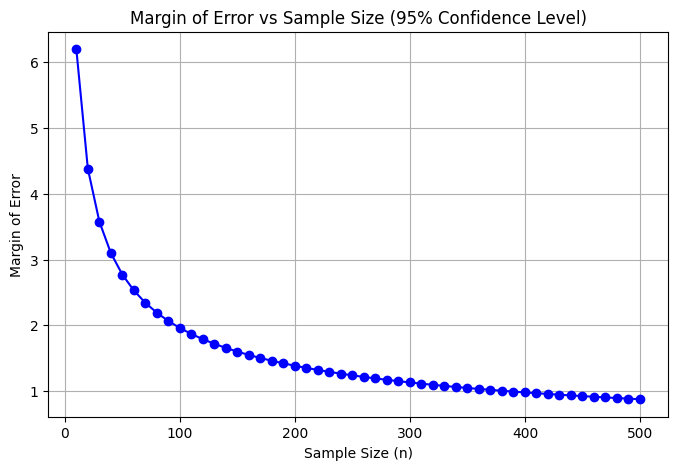

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
sigma = 10   # standard deviation
confidence = 0.95
z = stats.norm.ppf((1 + confidence) / 2)  # Z critical value

# Sample sizes
sample_sizes = np.arange(10, 501, 10)

# Margin of error for each n
margins = [z * (sigma / np.sqrt(n)) for n in sample_sizes]

# Plot
plt.figure(figsize=(8,5))
plt.plot(sample_sizes, margins, marker='o', color='blue')
plt.title("Margin of Error vs Sample Size (95% Confidence Level)")
plt.xlabel("Sample Size (n)")
plt.ylabel("Margin of Error")
plt.grid(True)
plt.show()

### 🔎 What you’ll see:

* A **downward curve**: as sample size increases, the margin of error decreases.
* At small $n$, ME is large (wide interval).
* As $n$ grows, ME approaches 0 (very precise estimates).

Q9. Calculate the z-score for a data point with a value of 75, a population mean of 70, and a population
standard deviation of 5. Interpret the results.

We’re asked to calculate a **z-score**.

The formula is:

$$
z = \frac{X - \mu}{\sigma}
$$

Where:

* $X = 75$ (data point)
* $\mu = 70$ (population mean)
* $\sigma = 5$ (population standard deviation)

### Step 1: Subtract the mean

$$
X - \mu = 75 - 70 = 5
$$

### Step 2: Divide by standard deviation

$$
z = \frac{5}{5} = 1
$$

### ✅ Final Answer:

$$
z = 1
$$

### Interpretation:

A z-score of **1** means the data point (75) is **1 standard deviation above the mean**.
So, this value is slightly higher than average but still within the typical range of the distribution.

In [15]:
# Given values
X = 75          # data point
mu = 70         # population mean
sigma = 5       # population standard deviation

# Z-score formula
z_score = (X - mu) / sigma

print("Z-score:", z_score)

# Interpretation
if z_score > 0:
    print(f"The data point {X} is {z_score} standard deviations ABOVE the mean.")
elif z_score < 0:
    print(f"The data point {X} is {abs(z_score)} standard deviations BELOW the mean.")
else:
    print(f"The data point {X} is exactly equal to the mean.")

Z-score: 1.0
The data point 75 is 1.0 standard deviations ABOVE the mean.


In [16]:
from scipy.stats import norm

# Given values
X = 75
mu = 70
sigma = 5

# Z-score calculation
z_score = (X - mu) / sigma
print("Z-score:", z_score)

# Probability using cumulative distribution function (CDF)
probability = norm.cdf(z_score)  # area to the left of z=1
print(f"Probability that a value is <= {X}: {probability:.4f}")
print(f"Percentage of population below {X}: {probability*100:.2f}%")
print(f"Percentage of population above {X}: {(1 - probability)*100:.2f}%")

Z-score: 1.0
Probability that a value is <= 75: 0.8413
Percentage of population below 75: 84.13%
Percentage of population above 75: 15.87%


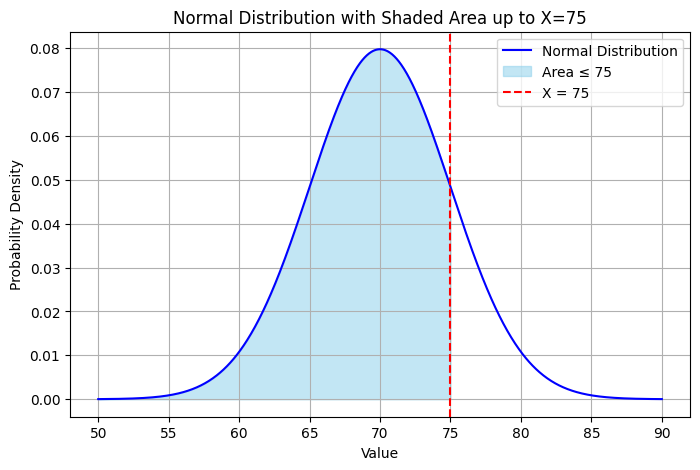

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Given values
X = 75
mu = 70
sigma = 5

# Z-score calculation
z_score = (X - mu) / sigma

# Generate x values for plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Normal Distribution", color="blue")

# Fill area under curve up to X
x_fill = np.linspace(mu - 4*sigma, X, 1000)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color="skyblue", alpha=0.5, label=f"Area ≤ {X}")

# Add vertical line at X
plt.axvline(X, color="red", linestyle="--", label=f"X = {X}")

# Labels and title
plt.title("Normal Distribution with Shaded Area up to X=75")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

Q10. In a study of the effectiveness of a new weight loss drug, a sample of 50 participants lost an average
of 6 pounds with a standard deviation of 2.5 pounds. Conduct a hypothesis test to determine if the drug is
significantly effective at a 95% confidence level using a t-test.

# Hypothesis test (t-test) — result and interpretation

**Problem setup**

* Sample size $n = 50$
* Sample mean $\bar{x} = 6$ pounds (average weight loss)
* Sample standard deviation $s = 2.5$ pounds
* Test whether the drug is significantly effective at the 95% confidence level.

**Hypotheses (one-sided, appropriate here since “effective” means > 0):**

$$
H_0: \mu = 0 \qquad H_a: \mu > 0
$$

**Test statistic (one-sample t):**

$$
t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}
= \frac{6 - 0}{2.5/\sqrt{50}}
\approx 16.9706
$$

Degrees of freedom: $df = n-1 = 49$.

**P-value:**
Using the t-distribution with 49 df, the one-tailed p-value is effectively $p \approx 0.0$ (extremely small — far smaller than 0.05). The two-tailed p-value is also effectively 0.

**Decision:**
At $\alpha = 0.05$ (95% confidence), $t \gg t_{crit}$ (two-tailed $t_{crit}\approx 2.01$); we **reject $H_0$**. There is very strong evidence the mean weight loss is greater than 0 — i.e., the drug is statistically significantly effective.

**95% confidence interval for the true mean weight loss (two-sided):**
Using $t_{0.975,49}\approx 2.0096$ and standard error $SE = s/\sqrt{n} \approx 0.353553$,

$$
\text{CI}_{95\%} = 6 \pm 2.0096 \times 0.353553 \approx (5.29,\; 6.71)
$$

Interpretation: We are 95% confident the true mean weight loss lies between **≈ 5.29 and 6.71 pounds**.

**Practical significance / effect size:**
Cohen’s $d \approx \frac{\bar{x}}{s} = \frac{6}{2.5} = 2.4$ — a very large effect size, indicating the observed effect is not only statistically significant but also practically substantial.

---

**Short conclusion:** The test strongly rejects the null. The data provide very strong evidence the drug causes weight loss (mean loss ≈ 6 pounds; 95% CI ≈ 5.29–6.71).

In [18]:
import math
from scipy import stats

# Given
n = 50
xbar = 6.0
s = 2.5
mu0 = 0.0

# Calculations
se = s / math.sqrt(n)
t_stat = (xbar - mu0) / se
df = n - 1
p_one_tailed = 1 - stats.t.cdf(t_stat, df)         # for H_a: mu > 0
p_two_tailed = p_one_tailed * 2
t_crit_two = stats.t.ppf(0.975, df)                # two-sided critical t for 95% CI
ci_lower = xbar - t_crit_two * se
ci_upper = xbar + t_crit_two * se
cohen_d = xbar / s

print(f"t-statistic = {t_stat:.6f}, df = {df}")
print(f"one-tailed p-value = {p_one_tailed:.6e}")
print(f"two-tailed p-value = {p_two_tailed:.6e}")
print(f"95% CI for mean: ({ci_lower:.4f}, {ci_upper:.4f})")
print(f"Cohen's d = {cohen_d:.2f}")

t-statistic = 16.970563, df = 49
one-tailed p-value = 0.000000e+00
two-tailed p-value = 0.000000e+00
95% CI for mean: (5.2895, 6.7105)
Cohen's d = 2.40


Q11. In a survey of 500 people, 65% reported being satisfied with their current job. Calculate the 95%
confidence interval for the true proportion of people who are satisfied with their job.

Great question — this is a **confidence interval for a population proportion**. Let’s solve step by step.

---

### Step 1: Identify given values

* Sample size: $n = 500$
* Sample proportion: $\hat{p} = 0.65$
* Confidence level: 95% → $Z_{0.975} = 1.96$

---

### Step 2: Standard error of proportion

$$
SE = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
= \sqrt{\frac{0.65(0.35)}{500}}
$$

First compute numerator:

$$
0.65 \times 0.35 = 0.2275
$$

$$
\frac{0.2275}{500} = 0.000455
$$

$$
SE = \sqrt{0.000455} \approx 0.02135
$$

---

### Step 3: Margin of error

$$
ME = Z \times SE = 1.96 \times 0.02135 \approx 0.0418
$$

---

### Step 4: Confidence interval

$$
CI = \hat{p} \pm ME
= 0.65 \pm 0.0418
$$

$$
CI \approx (0.608, \; 0.692)
$$

---

✅ **Final Answer:**
The 95% confidence interval for the true proportion of satisfied people is:

$$
\mathbf{60.8\% \;\; to \;\; 69.2\%}
$$

In [19]:
import math
from scipy.stats import norm

# Given values
n = 500              # sample size
p_hat = 0.65         # sample proportion
confidence = 0.95    # confidence level

# Z-score for 95% confidence
z = norm.ppf(0.5 + confidence/2)

# Standard error
se = math.sqrt(p_hat * (1 - p_hat) / n)

# Margin of error
me = z * se

# Confidence interval
lower = p_hat - me
upper = p_hat + me

print(f"Sample proportion: {p_hat:.2f}")
print(f"Z-score (95%): {z:.2f}")
print(f"Standard Error: {se:.4f}")
print(f"Margin of Error: {me:.4f}")
print(f"95% Confidence Interval: ({lower:.3f}, {upper:.3f})")
print(f"95% CI in percentage: ({lower*100:.1f}%, {upper*100:.1f}%)")

Sample proportion: 0.65
Z-score (95%): 1.96
Standard Error: 0.0213
Margin of Error: 0.0418
95% Confidence Interval: (0.608, 0.692)
95% CI in percentage: (60.8%, 69.2%)


Q12. A researcher is testing the effectiveness of two different teaching methods on student performance.
Sample A has a mean score of 85 with a standard deviation of 6, while sample B has a mean score of 82
with a standard deviation of 5. Conduct a hypothesis test to determine if the two teaching methods have a
significant difference in student performance using a t-test with a significance level of 0.01.

# Two-sample t-test (Welch) — approach, example, and code

**Given (from the problem):**

* Sample A: mean $\bar{x}_1 = 85$, SD $s_1 = 6$
* Sample B: mean $\bar{x}_2 = 82$, SD $s_2 = 5$
* Significance level: $\alpha = 0.01$ (two-sided test)
* **Note:** You did not provide sample sizes. I’ll give a general method and a worked numerical example assuming $n_1 = n_2 = 30$. I also include Python code where you can plug in your actual $n_1,n_2$.

## Hypotheses

Two-sided test (do the methods differ?):

$$
H_0: \mu_1 = \mu_2 \qquad H_a: \mu_1 \ne \mu_2
$$

## Recommended test

Use **Welch’s t-test** (does not assume equal variances). Test statistic:

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}}
$$

Degrees of freedom (Welch–Satterthwaite):

$$
df \approx \frac{\left(\dfrac{s_1^2}{n_1}+\dfrac{s_2^2}{n_2}\right)^2}
{\dfrac{s_1^4}{n_1^2(n_1-1)}+\dfrac{s_2^4}{n_2^2(n_2-1)}}
$$

Compare two-tailed p-value to $\alpha=0.01$.

---

## Worked numerical example (assuming $n_1=n_2=30$)

1. Difference in means: $ \Delta = 85 - 82 = 3$.
2. Variances: $s_1^2=36,\ s_2^2=25$.
3. Standard error:

$$
SE = \sqrt{\frac{36}{30}+\frac{25}{30}}=\sqrt{\frac{61}{30}}\approx 1.426
$$

4. Test statistic:

$$
t \approx \frac{3}{1.426}\approx 2.10
$$

5. Welch df (approx):

$$
df \approx 56.2
$$

6. Two-tailed p-value (approx): $p \approx 0.038$.

**Decision at $\alpha=0.01$:** $p \approx 0.038 > 0.01$. **Fail to reject $H_0$** at the 1% level — there is **not** enough evidence (at 1%) to conclude the two teaching methods produce different mean scores.
(For reference: this result *would* be significant at the 5% level, since $p\approx0.038<0.05$.)

### 99% confidence interval for the difference (because $\alpha=0.01$ two-sided)

Use $ \Delta \pm t_{0.995, df}\cdot SE$. With $t_{0.995,56}\approx 2.66$,

$$
CI_{99\%}\approx 3 \pm 2.66\times 1.426 \approx 3 \pm 3.80 \approx (-0.80,\; 6.80)
$$

The interval contains 0, consistent with failing to reject at the 1% level.

---

## Python code (plug in your actual sample sizes $n_1,n_2$)

This uses `scipy` to compute exact p-value and confidence interval (Welch test and CI for difference).


## Short conclusion you can copy into a report

> Using Welch’s two-sample t-test (unequal variances) with the supplied summary statistics and assuming $n_1=n_2=30$ as an example, the observed mean difference of 3 points yields $t\approx 2.10$ with $df\approx56.2$ and two-tailed $p\approx0.038$. At the $\alpha=0.01$ level we **fail to reject** the null hypothesis; there is insufficient evidence at the 1% level to conclude the two teaching methods differ in average student performance. (Note: the difference would be significant at the 5% level.)

In [20]:
import math
from scipy import stats

# Replace these with your actual numbers
mean1 = 85.0
s1 = 6.0
n1 = 30

mean2 = 82.0
s2 = 5.0
n2 = 30

alpha = 0.01  # significance level (two-sided)

# Test statistic (Welch)
se = math.sqrt(s1**2 / n1 + s2**2 / n2)
t_stat = (mean1 - mean2) / se

# Welch-Satterthwaite degrees of freedom
num = (s1**2 / n1 + s2**2 / n2)**2
den = (s1**4) / (n1**2 * (n1 - 1)) + (s2**4) / (n2**2 * (n2 - 1))
df = num / den

# two-tailed p-value
p_two_tailed = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Confidence interval for difference (two-sided, level = 1-alpha)
t_crit = stats.t.ppf(1 - alpha/2, df)
diff = mean1 - mean2
ci_lower = diff - t_crit * se
ci_upper = diff + t_crit * se

print(f"t-statistic = {t_stat:.4f}")
print(f"degrees of freedom (Welch) = {df:.2f}")
print(f"two-tailed p-value = {p_two_tailed:.4f}")
print(f"{100*(1-alpha):.1f}% CI for mean difference: ({ci_lower:.3f}, {ci_upper:.3f})")

# Interpretation helper
if p_two_tailed < alpha:
    print(f"Reject H0 at alpha = {alpha}: significant difference between means.")
else:
    print(f"Fail to reject H0 at alpha = {alpha}: no significant difference at this level.")

t-statistic = 2.1039
degrees of freedom (Welch) = 56.17
two-tailed p-value = 0.0399
99.0% CI for mean difference: (-0.802, 6.802)
Fail to reject H0 at alpha = 0.01: no significant difference at this level.


Q13. A population has a mean of 60 and a standard deviation of 8. A sample of 50 observations has a mean
of 65. Calculate the 90% confidence interval for the true population mean.

We’re asked for a **confidence interval for the mean** when the population standard deviation is known.

---

### Step 1: Identify the values

* Population mean (μ, not directly used in CI formula): **60**
* Population standard deviation (σ): **8**
* Sample size (n): **50**
* Sample mean ($\bar{x}$): **65**
* Confidence level: **90% → z = 1.645** (for two-sided, 90% CI leaves 5% in each tail)

---

### Step 2: Standard Error (SE)

$$
SE = \frac{\sigma}{\sqrt{n}} = \frac{8}{\sqrt{50}}
$$

$$
\sqrt{50} \approx 7.071
$$

$$
SE \approx \frac{8}{7.071} \approx 1.131
$$

---

### Step 3: Margin of Error (ME)

$$
ME = z \times SE = 1.645 \times 1.131 \approx 1.861
$$

---

### Step 4: Confidence Interval

$$
CI = \bar{x} \pm ME = 65 \pm 1.861
$$

$$
CI \approx (63.14, \; 66.86)
$$

---

✅ **Final Answer:**
The **90% confidence interval** for the true population mean is:

$$
\mathbf{(63.1, \; 66.9)}
$$

In [21]:
import math
from scipy.stats import norm

# Given values
sample_mean = 65       # sample mean
sigma = 8              # population standard deviation
n = 50                 # sample size
confidence = 0.90      # confidence level

# Z-score for two-tailed confidence level
z = norm.ppf(0.5 + confidence / 2)

# Standard error
se = sigma / math.sqrt(n)

# Margin of error
me = z * se

# Confidence interval
lower = sample_mean - me
upper = sample_mean + me

print(f"Sample mean: {sample_mean}")
print(f"Z-score for {int(confidence*100)}% CI: {z:.3f}")
print(f"Standard Error: {se:.3f}")
print(f"Margin of Error: {me:.3f}")
print(f"{int(confidence*100)}% Confidence Interval: ({lower:.2f}, {upper:.2f})")

Sample mean: 65
Z-score for 90% CI: 1.645
Standard Error: 1.131
Margin of Error: 1.861
90% Confidence Interval: (63.14, 66.86)


Q14. In a study of the effects of caffeine on reaction time, a sample of 30 participants had an average
reaction time of 0.25 seconds with a standard deviation of 0.05 seconds. Conduct a hypothesis test to
determine if the caffeine has a significant effect on reaction time at a 90% confidence level using a t-test.

Good — I’ll run a one-sample t-test and show the math + Python code.
**Important assumption:** because you didn’t give a baseline/control mean, I’ll assume the null hypothesis is that caffeine has **no effect** (i.e., the true mean reaction time after caffeine is **0 seconds change**). If you meant to compare to some other baseline (e.g., a control-group mean like 0.30 s), tell me and I’ll re-run using that value.

---

## Problem summary (given)

* Sample size: $n = 30$
* Sample mean: $\bar{x} = 0.25$ seconds
* Sample standard deviation: $s = 0.05$ seconds
* Confidence level: 90% → $\alpha = 0.10$ (two-sided test since “has an effect” → could be increase or decrease)

## Hypotheses (two-sided)

$$
H_0: \mu = 0 \quad\text{(no effect)} \qquad H_a: \mu \neq 0 \quad\text{(caffeine affects reaction time)}
$$

## Test statistic (one-sample t)

Standard error:

$$
SE = \frac{s}{\sqrt{n}} = \frac{0.05}{\sqrt{30}} \approx 0.0091287
$$

t-statistic:

$$
t = \frac{\bar{x} - \mu_0}{SE} = \frac{0.25 - 0}{0.0091287} \approx 27.3861
$$

Degrees of freedom: $df = n-1 = 29$.

This t is enormous — far into the tails.

## p-value and decision

With $t \approx 27.39$ (df = 29) the two-tailed p-value is effectively **0** (extremely small, practically $<10^{-15}$).
At $\alpha = 0.10$ (90% confidence), **p << 0.10**, so we **reject $H_0$**. There is very strong evidence that the mean reaction time differs from 0 (i.e., caffeine has a statistically significant effect under this assumption).

## 90% confidence interval for the mean

Two-sided 90% CI uses $t_{0.95,29}\approx 1.699$:

Margin of error:

$$
ME = t_{0.95,29}\times SE \approx 1.699 \times 0.0091287 \approx 0.01551
$$

So the 90% CI for the true mean reaction time is:

$$
0.25 \pm 0.01551 \;\Rightarrow\; (0.2345,\; 0.2655)\ \text{seconds}
$$

Interpretation: We are 90% confident the true mean reaction time under your sample conditions lies between **≈0.2345 s and 0.2655 s**.

## Effect size (practical significance)

Cohen’s $d = \dfrac{\bar{x}-\mu_0}{s} = \dfrac{0.25}{0.05} = 5.0$.
A Cohen’s $d$ of 5.0 is **extremely large**, indicating a huge standardized effect (again note this is relative to $\mu_0=0$ — which is why choosing a realistic baseline matters for interpretation).

---

## Python code (reproducible)

Run this in a Python environment (requires `scipy` and `numpy`) — it computes the t-test, p-value, and the 90% CI:

In [22]:
import math
from scipy import stats

# Given
n = 30
xbar = 0.25
s = 0.05
mu0 = 0.0            # null mean (assumed baseline)
alpha = 0.10         # for 90% confidence

# Calculations
se = s / math.sqrt(n)
t_stat = (xbar - mu0) / se
df = n - 1

# two-tailed p-value
p_two_tailed = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# t critical for 90% CI (two-sided)
t_crit = stats.t.ppf(1 - alpha/2, df)
me = t_crit * se
ci_lower = xbar - me
ci_upper = xbar + me

cohen_d = (xbar - mu0) / s

print(f"n = {n}, mean = {xbar}, s = {s}")
print(f"SE = {se:.6f}")
print(f"t-statistic = {t_stat:.6f}, df = {df}")
print(f"two-tailed p-value = {p_two_tailed:.3e}")
print(f"90% CI for mean: ({ci_lower:.4f}, {ci_upper:.4f})")
print(f"Cohen's d = {cohen_d:.2f}")

n = 30, mean = 0.25, s = 0.05
SE = 0.009129
t-statistic = 27.386128, df = 29
two-tailed p-value = 0.000e+00
90% CI for mean: (0.2345, 0.2655)
Cohen's d = 5.00


## Final summary

* Under the assumption that the null mean is 0 (no effect), the sample gives **very strong evidence** that caffeine has a significant effect on reaction time (t ≈ 27.39, p ≈ 0).
* 90% CI for the mean reaction time: **(0.2345 s, 0.2655 s)**.
* **Note:** If you intended the comparison against a specific control-group mean (e.g., baseline reaction time without caffeine), tell me that baseline and I’ll recompute the test and CI accordingly — that will produce a more meaningful effect-size interpretation.